In [21]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.options.display.max_columns = None

In [22]:
df = pd.read_csv('data/analytic_data2019.csv', low_memory=False)
df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

### Remove extraneous columns used for calculations

In [23]:
headers_ = [x for x in df.columns if 'raw value' in x 
            or 'FIPS' in x 
            or 'State Abbreviation' in x 
            or 'Name' in x 
            or 'Release Year' in x
            or 'County Ranked' in x
            or 'Percentage of households' in x
            ]

df = df[headers_]
df.shape

(3195, 115)

### Remove National and State level aggregators, and unnecessary secondary column header row

In [24]:
df = df[df['County FIPS Code'] != '000']
df.drop([0], inplace=True)
df.reset_index(drop=True)
df.shape

(3142, 115)

In [25]:
df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Sexually transmitted infections raw value,Teen births raw value,Uninsured raw value,Primary care physicians raw value,Dentists raw value,Mental health providers raw value,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Violent crime raw value,Injury deaths raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Child mortality raw value,Infant mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,HIV prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Drug overdose deaths raw value,Motor vehicle crash deaths raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Disconnected youth raw value,Median household income raw value,Children eligible for free or reduced price lunch raw value,Residential segregation - Black/White raw value,Residential segregation - non-white/white raw value,Homicides raw value,Firearm fatalities raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value,Communicable disease raw value,Self-inflicted injury hospitalizations raw value,Cancer incidence raw value,Coronary heart disease hospitalizations raw value,Cerebrovascular disease hospitalizations raw value,Smoking during pregnancy raw value,Drug arrests raw value,Opioid hospital visits raw value,Alcohol-related hospitalizations raw value,Motor vehicle crash occupancy rate raw value,On-road motor vehicle crash-related ER visits raw value,Off-road motor vehicle crash-related ER visits raw value,Childhood immunizations raw value,Reading proficiency raw value,W-2 enrollment raw value,Poverty raw value,Older adults living alone raw value,Hate crimes raw value,Child abuse raw value,Injury hospitalizations raw value,Fall fatalities 65+ raw value,Year structure built raw value,Male population 0-17 raw value,Male population 18-44 raw value,Male population 45-64 raw value,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,0.1841112436,4.2005779826,4.3067392835,0.0847571942,0.191246585,0.375,7.2,0.311,0.686775027,0.1687801512,0.2881355932,341.2,26.52420801,0.085009665,0.0004150426,0.000324301,0.0001621505,6599,0.44,0.41,0.9,0.6085466499,0.0386352233,0.193

### Dropping columns with errors in data

In [26]:
### drop cols
df.drop(['Premature age-adjusted mortality raw value', 
         'Premature death raw value',
        ], axis=1)


,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Sexually transmitted infections raw value,Teen births raw value,Uninsured raw value,Primary care physicians raw value,Dentists raw value,Mental health providers raw value,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Violent crime raw value,Injury deaths raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Child mortality raw value,Infant mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,HIV prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Drug overdose deaths raw value,Motor vehicle crash deaths raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Disconnected youth raw value,Median household income raw value,Children eligible for free or reduced price lunch raw value,Residential segregation - Black/White raw value,Residential segregation - non-white/white raw value,Homicides raw value,Firearm fatalities raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value,Communicable disease raw value,Self-inflicted injury hospitalizations raw value,Cancer incidence raw value,Coronary heart disease hospitalizations raw value,Cerebrovascular disease hospitalizations raw value,Smoking during pregnancy raw value,Drug arrests raw value,Opioid hospital visits raw value,Alcohol-related hospitalizations raw value,Motor vehicle crash occupancy rate raw value,On-road motor vehicle crash-related ER visits raw value,Off-road motor vehicle crash-related ER visits raw value,Childhood immunizations raw value,Reading proficiency raw value,W-2 enrollment raw value,Poverty raw value,Older adults living alone raw value,Hate crimes raw value,Child abuse raw value,Injury hospitalizations raw value,Fall fatalities 65+ raw value,Year structure built raw value,Male population 0-17 raw value,Male population 18-44 raw value,Male population 45-64 raw value,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value
3,01,001,01001,AL,Autauga County,2019,1,0.1841112436,4.2005779826,4.3067392835,0.0847571942,0.191246585,0.375,7.2,0.311,0.686775027,0.1687801512,0.2881355932,341.2,26.52420801,0.085009665,0.0004150426,0.000324301,0.0001621505,6599,0.44,0.41,0.9,0.6085466499,0.0386352233,0.193,4.6366638778,0.2470009686,12.631730908,272.28222006,74.031808398,11.7,0,0.1495464

In [27]:
# Primary care physicians raw value - missing values should be zeros in the dataset.  
# df['Primary care physicians raw value'].fillna(0, inplace=True);
# df['Dentists raw value'].fillna(0, inplace=True);
# df['Mental health providers raw value'].fillna(0, inplace=True);
df.fillna({'Mental health providers raw value':0, 'Dentists raw value':0, 'Primary care physicians raw value':0}, inplace=True)

In [28]:
drop_for_msng_vals = [index for index, value in df.isna().mean().iteritems() if value>.1]
df.drop(drop_for_msng_vals, axis=1, inplace=True)
df.shape

(3142, 72)

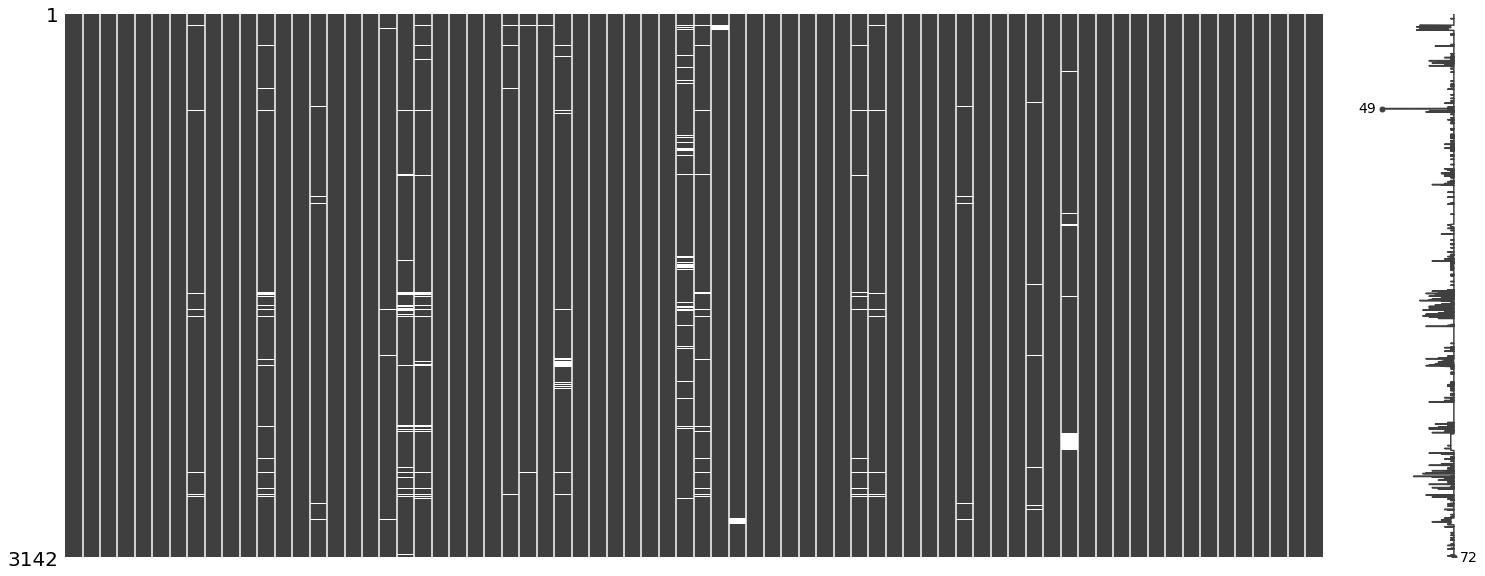

In [29]:
msno.matrix(df)

In [30]:
df.isna().mean().sort_values()

State FIPS Code                                                         0.000000
Mental health providers raw value                                       0.000000
Food insecurity raw value                                               0.000000
% 65 and older raw value                                                0.000000
% below 18 years of age raw value                                       0.000000
Population raw value                                                    0.000000
Some college raw value                                                  0.000000
Income inequality raw value                                             0.000000
Social associations raw value                                           0.000000
% Females raw value                                                     0.000000
Homeownership raw value                                                 0.000000
Severe housing problems raw value                                       0.000000
Percentage of households wit

In [31]:
df.dropna(subset=['High school graduation raw value'], inplace = True)

### Change columns to numeric

In [32]:
#df.to_numeric(df['High school graduation raw value'], )

headers2_ = [x for x in df.columns if 'raw value' in x or 'Percentage of households' in x]
df[headers2_] = df[headers2_].apply(pd.to_numeric)

# type(df['High school graduation raw value'][5])  # this line confirms relevant fields converted to numeric dtype 

### Check for multicolinearity

In [33]:
def gen_high_corrs(corr_matrix):
    temps = {'rs':[], 'cs':[], 'vs':[]}
    for col in corr_matrix.columns:
        for row, value in corr_matrix[col].iteritems():
            if value > .5 or value <-.5:
                temps['rs'].append(row)
                temps['cs'].append(col)
                temps['vs'].append(value)
                temps_df = pd.DataFrame(temps)
    return temps_df #, temps_df.shape

def corr_check(header_index_list, df):
    mini_corr_matrix = df.drop(header_index_list, axis=1).corr()
    sns.heatmap(mini_corr_matrix)
    return mini_corr_matrix#gen_high_corrs(mini_corr_matrix).cs.value_counts()



#### Remove variables with high correlations to eachother

['Poor or fair health raw value', 'Children in poverty raw value', 'Food insecurity raw value', 'Frequent physical distress raw value', 'Premature age-adjusted mortality raw value', 'Frequent mental distress raw value', 'Poor physical health days raw value', 'Children eligible for free or reduced price lunch raw value', 'Adult smoking raw value', 'Median household income raw value', 'Excessive drinking raw value', 'Some college raw value', 'Physical inactivity raw value', 'Poor mental health days raw value', 'Insufficient sleep raw value', 'Food environment index raw value', '% Non-Hispanic white raw value', 'Severe housing problems raw value', 'Injury deaths raw value', 'Preventable hospital stays raw value', 'Driving alone to work raw value', 'Mammography screening raw value', 'Flu vaccinations raw value', 'Injury deaths raw value', 'Social associations raw value', 'Limited access to healthy foods raw value', 'Long commute - driving alone raw value', 'Food environment index raw value

,Premature death raw value,Low birthweight raw value,Adult obesity raw value,Alcohol-impaired driving deaths raw value,Sexually transmitted infections raw value,Teen births raw value,Uninsured raw value,Primary care physicians raw value,Dentists raw value,Mental health providers raw value,High school graduation raw value,Unemployment raw value,Income inequality raw value,Children in single-parent households raw value,Violent crime raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Diabetes prevalence raw value,Other primary care providers raw value,Homeownership raw value,Population raw value,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
Premature death raw value,1.000000,0.533158,0.468707,0.005830,0.361892,0.676342,0.303380,-0.267241,-0.240317,-0.074564,-0.132765,0.450145,0.412613,0.537114,0.251130,0.155092,-0.013855,-0.003225,0.166129,0.165107,0.631990,0.068672,-0.052501,-0.182187,0.100371,0.332571,0.320282,-0.305127,-0.075881,-0.134674,-0.209726,0.112027,0.276362
Low birthweight raw value,0.533158,1.000000,0.276007,-0.052540,0.436322,0.459334,0.231170,-0.144370,-0.159230,-0.033764,-0.161490,0.320608,0.475352,0.582360,0.383562,0.202356,-0.042753,0.239707,0.006908,-0.060739,0.489759,0.006276,-0.188230,-0.012587,-0.055006,0.688299,-0.080445,-0.096953,-0.042337,-0.028422,-0.065461,0.112798,0.027052
Adult obesity raw value,0.468707,0.276007,1.000000,-0.003479,0.183052,0.397354,0.040757,-0.299670,-0.271520,-0.240177,0.029075,0.245203,0.118750,0.329844,0.106472,0.322031,-0.091017,-0.209447,-0.039820,-0.007326,0.668267,-0.041429,0.093901,-0.247067,-0.051740,0.328332,0.074488,-0.313439,-0.113982,-0.292162,-0.237675,0.068598,0.241509
Alcohol-impaired driving deaths raw value,0.005830,-0.052540,-0.003479,1.000000,-0.004670,-0.079092,-0.077490,-0.004090,0.042908,0.043043,-0.038536,0.050453,-0.027326,-0.014796,-0.029459,-0.131086,0.014476,-0.014425,0.038387,0.083376,-0.062655,-0.025087,0.034466,-0.017530,0.067223,-0.035742,0.136829,0.011446,0.037031,-0.080356,-0.072442,-0.043976,0.067695
Sexually transmitted infections raw value,0.361892,0.436322,0.183052,-0.004670,1.000000,0.341550,0.245725,0.065180,0.114022,0.214800,-0.367216,0.251499,0.431458,0.576807,0.519146,0.141526,0.012532,0.350689,0.376649,0.200707,0.159466,0.173707,-0.541813,0.140730,-0.364328,0.594618,0.356590,0.102319,0.034353,0.088225,0.093056,0.157717,-0.274470
Teen births raw value,0.676342,0.459334,0.397354,-0.079092,0.341550,1.000000,0.518066,-0.329189,-0.267922,-0.128401,-0.149762,0.408823,0.328414,0.478483,0.283081,0.091177,0.017032,-0.112113,0.363900,0.147324,0.472621,-0.006476,-0.135947,-0.155430,-0.074629,0.238793,0.255688,-0.260213,-0.016139,0.261967,0.182678,-0.093491,0.158571
Uninsured raw value,0.303380,0.231170,0.040757,-0.077490,0.245725,0.518066,1.000000,-0.234999,-0.243357,-0.167966,-0.085788,0.124876,0.197714,0.212667,0.128037,-0.118033,0.070848,-0.038705,0.409572,0.181931,0.162265,-0.091665,-0.107203,-0.069224,-0.035123,0.184362,0.254541,-0.099317,-0.001987,0.441331,0.397575,-0.101950,0.161273
Primary care physicians raw value,-0.267241,-0.144370,-0.299670,-0.004090,0.065180,-0.329189,-0.234999,1.000000,0.549926,0.442902,-0.075424,-0.151961,0.036019,-0.057635,0.098498,-0.071732,0.057513,0.244534,-0.052099,0.008277,-0.305941,0.482570,-0.286122,0.200965,-0.074668,-0.050925,-0.010265,0.300777,0.055253,-0.043019,0.013281,0.193793,-0.428193
Dentists raw value,-0.240317,-0.159230,-0.271520,0.042908,0.114022,-0.267922,-0.243357,0.549926,1.000000,0.444800,-0.149247,-0.099667,0.009685,-0.027743,0.110552,-0.060922,0.080413,0.262134,0.0127

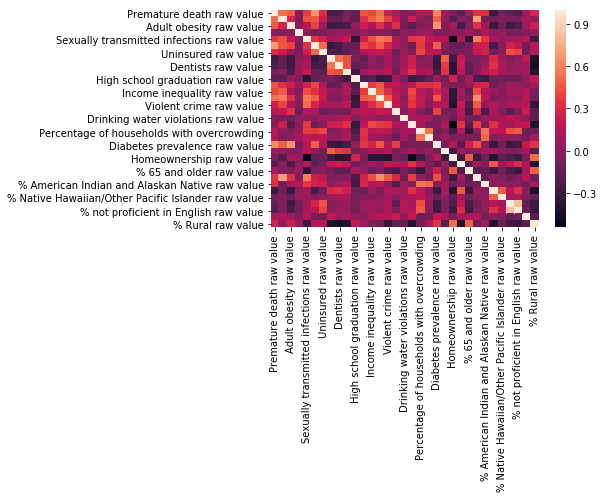

In [34]:
corr_matrix = df.corr()
drop_high_corrs_list = gen_high_corrs(corr_matrix).cs.value_counts().index[[0,1,2,3,4,5,7,9,10,12,14,16,17,18,19,20,22]]
temp_ls = list(drop_high_corrs_list)
temp_ls = temp_ls + ['Severe housing problems raw value',
               'Injury deaths raw value', 
               'Preventable hospital stays raw value', 
               'Driving alone to work raw value', 
               'Mammography screening raw value', 
               'Flu vaccinations raw value', 
               'Injury deaths raw value',
               'Social associations raw value', 
               'Limited access to healthy foods raw value',
               'Long commute - driving alone raw value', 
               'Food environment index raw value',
               'Access to exercise opportunities raw value',
               'Uninsured adults raw value', 
               'Uninsured children raw value',
               'Severe housing cost burden raw value',
               '% below 18 years of age raw value',
               'Life expectancy raw value']
print(temp_ls)
corr_check(temp_ls, df)

### Define and drop all columns that will be removed for to reduce multicolinearity.

In [35]:
extraneous_features = ['Poor or fair health raw value', 
                       'Frequent physical distress raw value', 
                       'Premature age-adjusted mortality raw value', 
                       'Food insecurity raw value', 
                       'Children in poverty raw value', 
                       'Frequent mental distress raw value', 
                       'Premature death raw value', 
                       'Poor physical health days raw value', 
                       'Adult smoking raw value', 
                       'Poor mental health days raw value', 
                       'Excessive drinking raw value', 
                       'Diabetes prevalence raw value', 
                       'Some college raw value', 
                       'Physical inactivity raw value', 
                       'Insufficient sleep raw value', 
                       'Low birthweight raw value', 
                       '% Non-Hispanic white raw value', 
                       'Severe housing problems raw value', 
                       'Injury deaths raw value', 
                       'Preventable hospital stays raw value', 
                       'Driving alone to work raw value', 
                       'Mammography screening raw value', 
                       'Flu vaccinations raw value', 
                       'Injury deaths raw value', 
                       'Social associations raw value', 
                       'Limited access to healthy foods raw value', 
                       'Long commute - driving alone raw value', 
                       'Food environment index raw value', 
                       'Access to exercise opportunities raw value', 
                       'Uninsured adults raw value', 
                       'Uninsured children raw value', 
                       'Severe housing cost burden raw value', 
                       '% below 18 years of age raw value',
                       'High school graduation raw value'
                       ]

features = df.drop(extraneous_features, axis=1)
headers3_ = [x for x in features.columns if 'raw value' in x or 'Percentage of households' in x]
features = df[headers3_]

target = df['High school graduation raw value']

features.shape

(3043, 32)

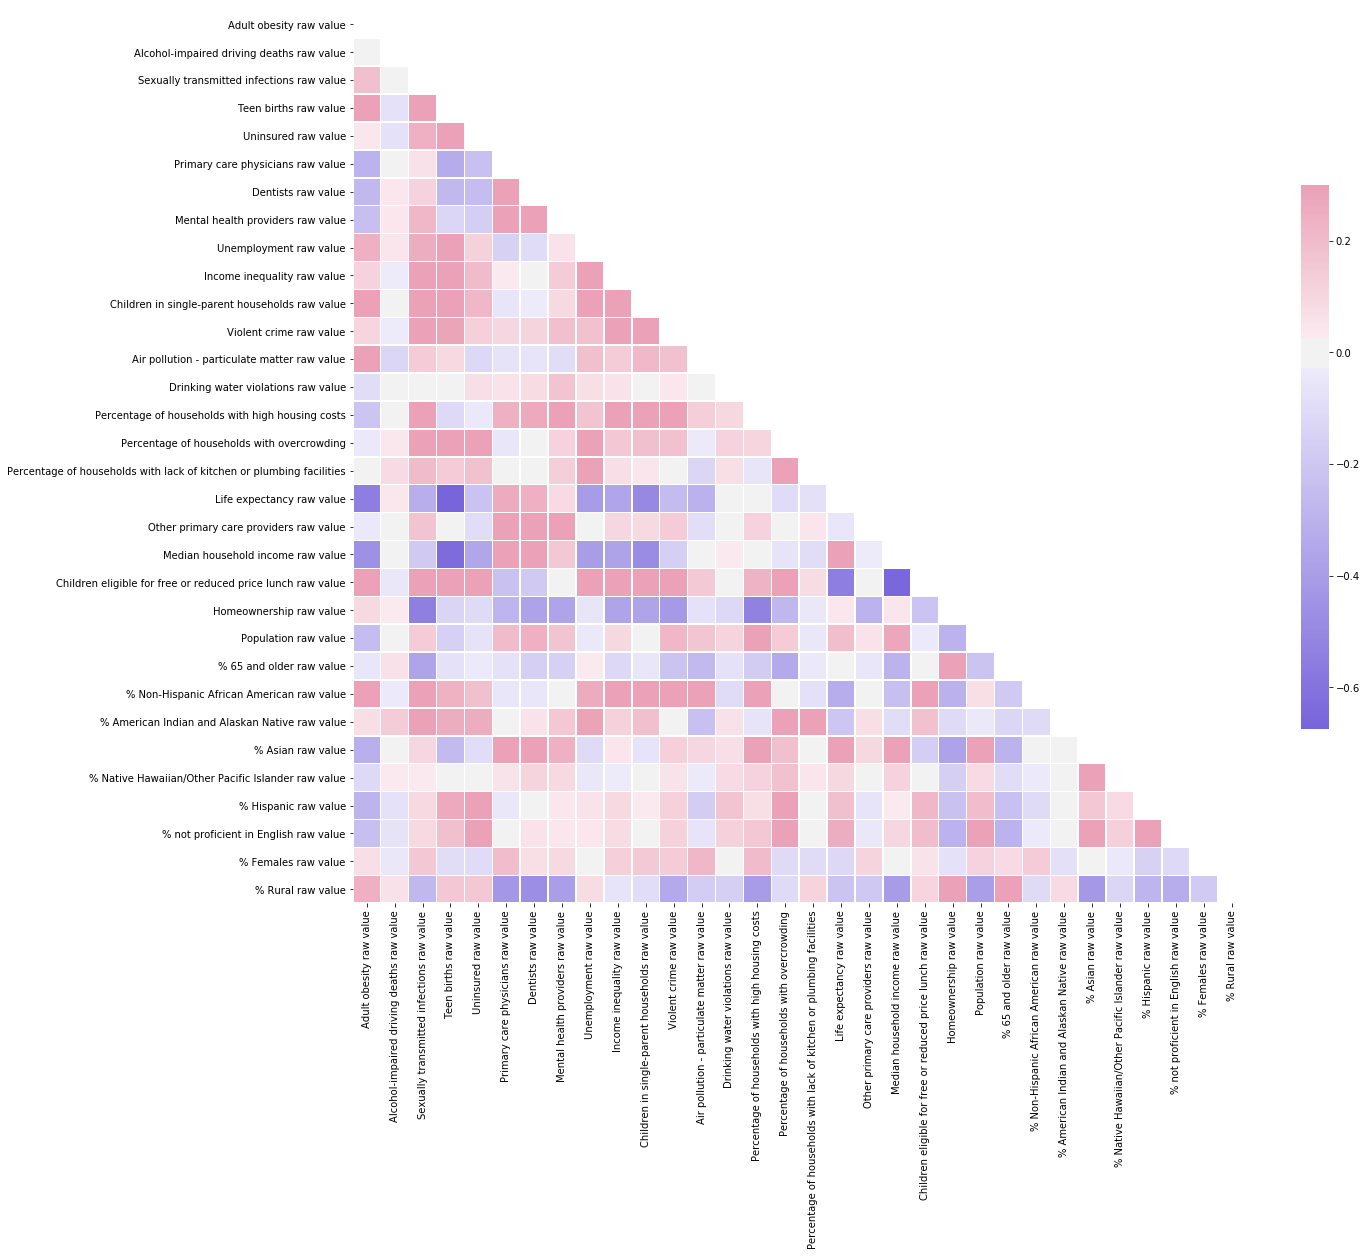

In [36]:
## Generate correlation matrix
corr_matrix = features.corr()

# Plot correlation matrix
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(270, 0, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Check missing data again

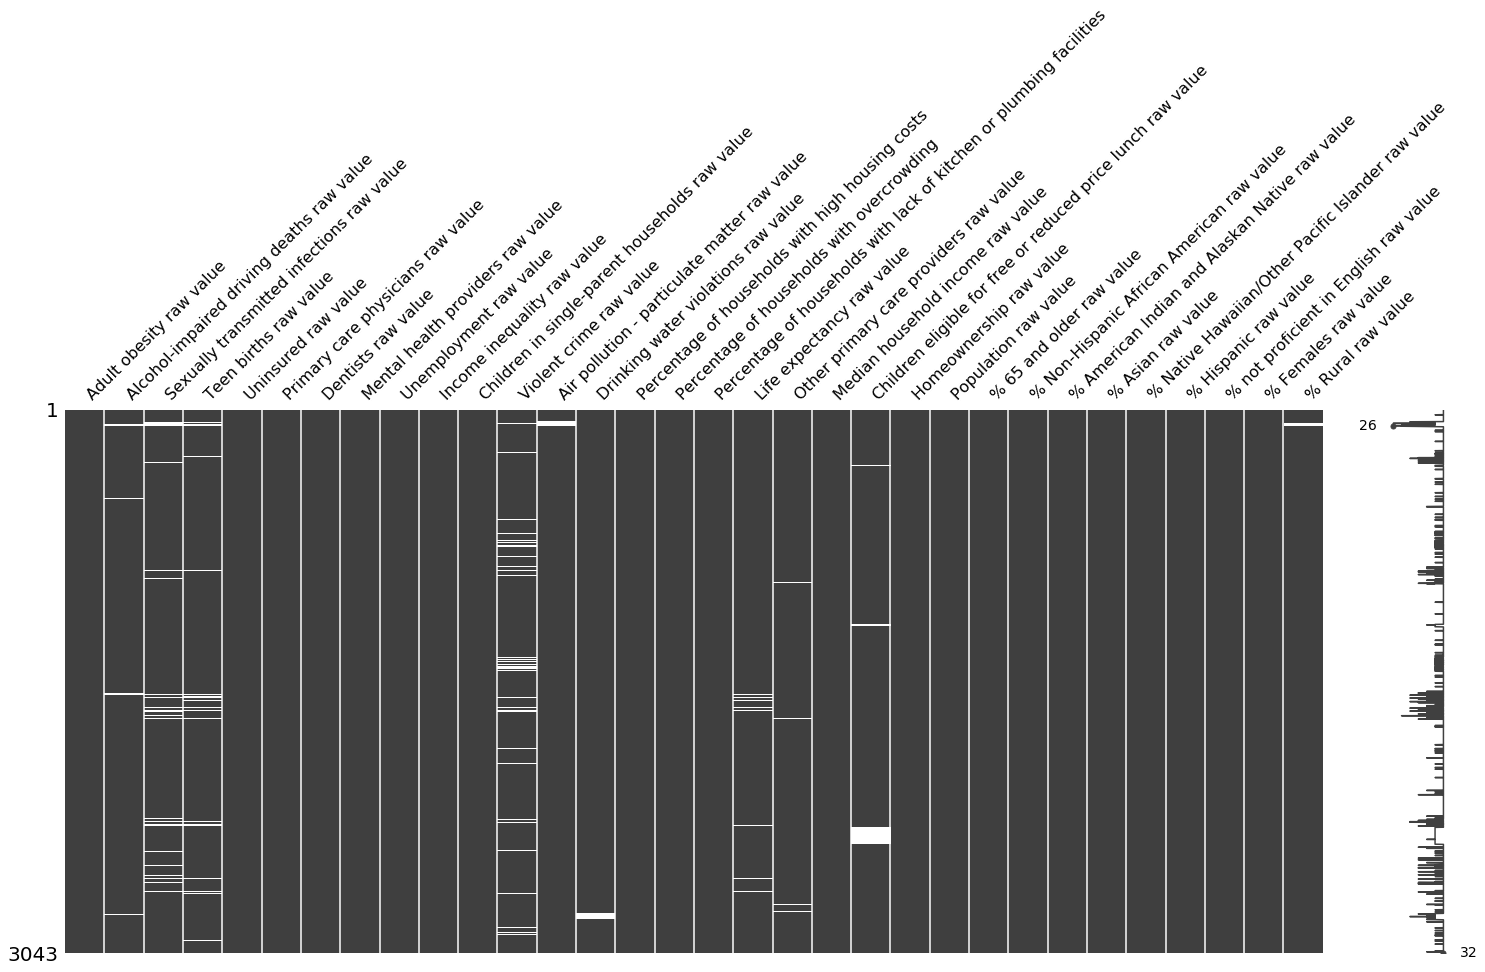

In [37]:
msno.matrix(features)

In [38]:
features.isna().mean().sort_values()

Adult obesity raw value                                                 0.000000
% not proficient in English raw value                                   0.000000
% Hispanic raw value                                                    0.000000
% Native Hawaiian/Other Pacific Islander raw value                      0.000000
% Asian raw value                                                       0.000000
% American Indian and Alaskan Native raw value                          0.000000
% Non-Hispanic African American raw value                               0.000000
% 65 and older raw value                                                0.000000
Population raw value                                                    0.000000
Homeownership raw value                                                 0.000000
Median household income raw value                                       0.000000
Percentage of households with lack of kitchen or plumbing facilities    0.000000
% Females raw value         

In [39]:
for col in features.columns:
    a = features[col].mean()
    features[col].fillna(a, inplace=True)

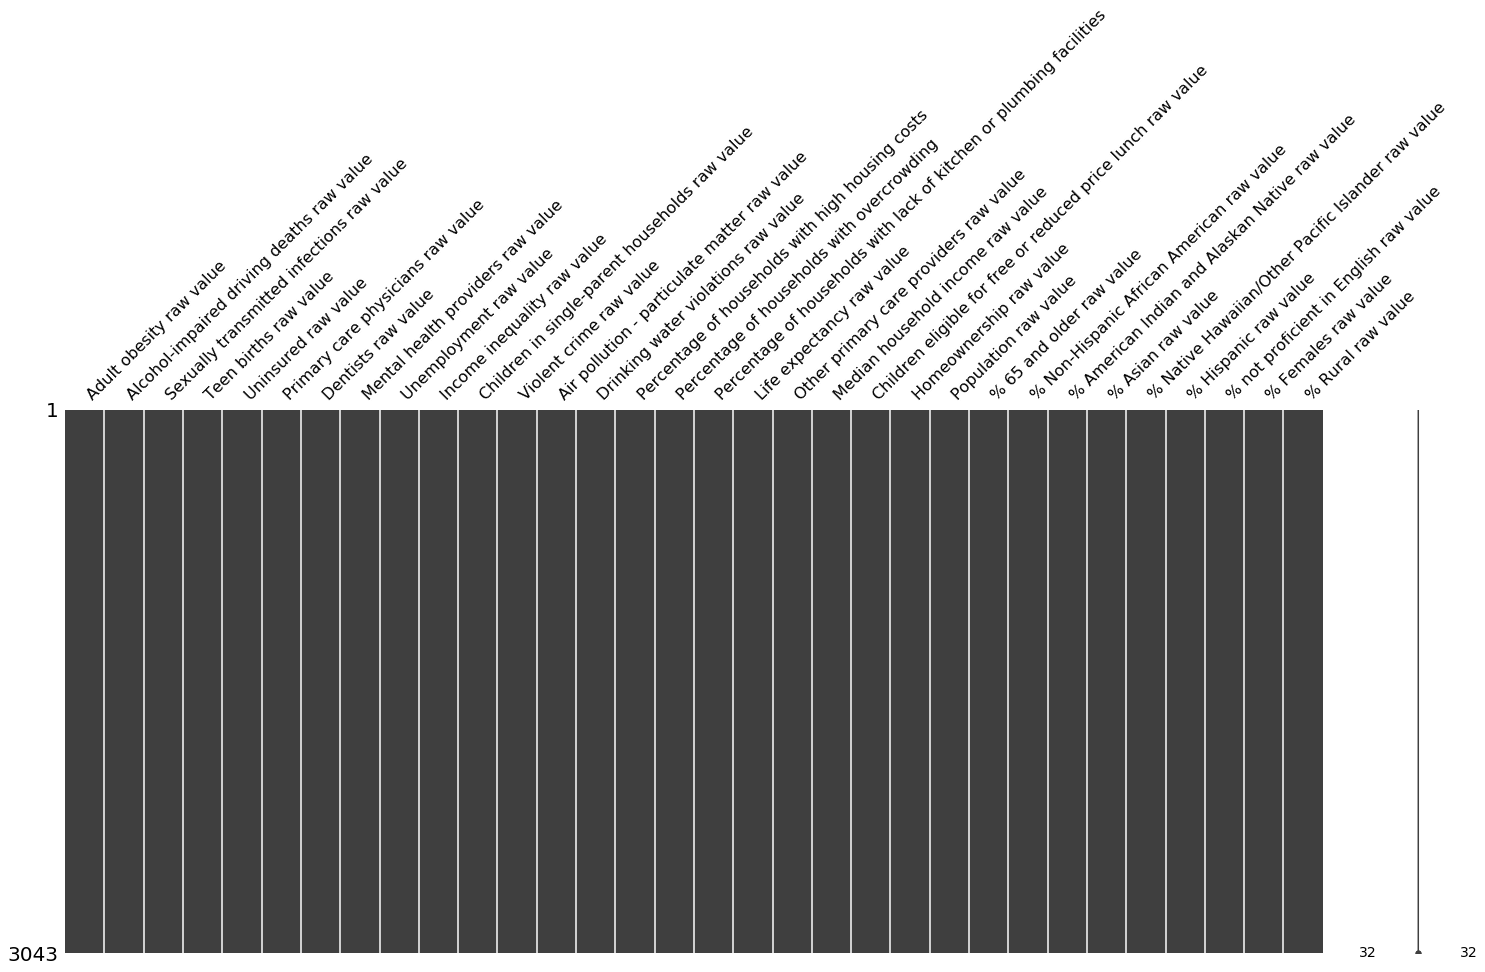

In [40]:
msno.matrix(features)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
